In [1]:
import pandas as pd
import os

In [2]:
# Merging 12 months of sales data into a single CSV file

files = [f for f in os.listdir('C:\\Users\\PC\\Desktop\\Pandas\\Sales_Data\\')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('C:\\Users\\PC\\Desktop\\Pandas\\Sales_Data\\'+file)
    
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('C:\\Users\\PC\\Desktop\\Pandas\\Sales_Data\\all_months_data.csv', index=False)

In [3]:
# Read in updated Data Frame

df = pd.read_csv('C:\\Users\\PC\\Desktop\\Pandas\\Sales_Data\\all_months_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# Add Month Column

df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [5]:
# Clean up the data

na_df = df[df.isna().any(axis=1)]
display(na_df.head())

df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [6]:
# Get rid of text in order date column
df = df[df['Order Date'].str[0:2] != 'Or']

In [7]:
# Make columns correct type
df['Month'] = df['Month'].astype('int32')

In [8]:
# Make columns correct type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) # to int
df['Price Each'] = pd.to_numeric(df['Price Each']) # to float

In [9]:
# Augment data with additional columns
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [10]:
df.groupby(['Month']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


### Data Exploration!

#### What was the best month for sales? How much was earned that month?

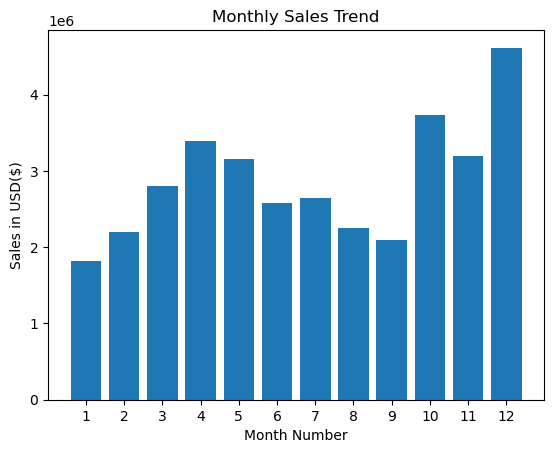

In [11]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD($)')
plt.title('Monthly Sales Trend')

plt.show()

#### What City had the highest number of sales

In [12]:
# Add city column

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


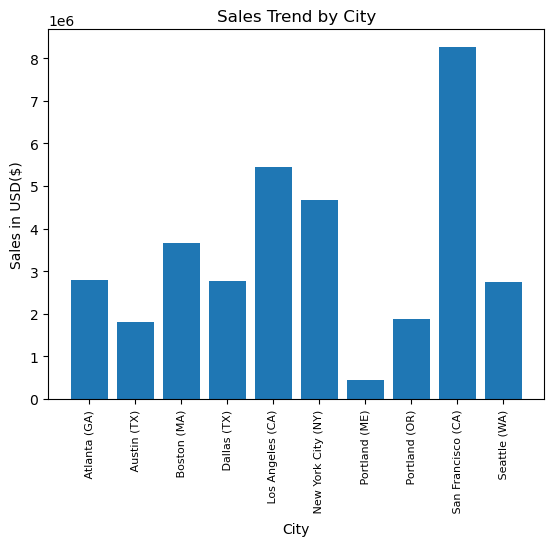

In [33]:
keys = [city[0] for city, d in df.groupby(['City'])]

plt.bar(keys, df.groupby(['City']).sum()['Sales'])

plt.xlabel('City')
plt.ylabel('Sales in USD($)')
plt.xticks(keys, rotation='vertical', size=8)
plt.title('Sales Trend by City')

plt.show()

#### What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
# add hour column

df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute

C:\Users\PC\AppData\Local\Temp\ipykernel_3416\2553188494.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
C:\Users\PC\AppData\Local\Temp\ipykernel_3416\2553188494.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute


In [15]:
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


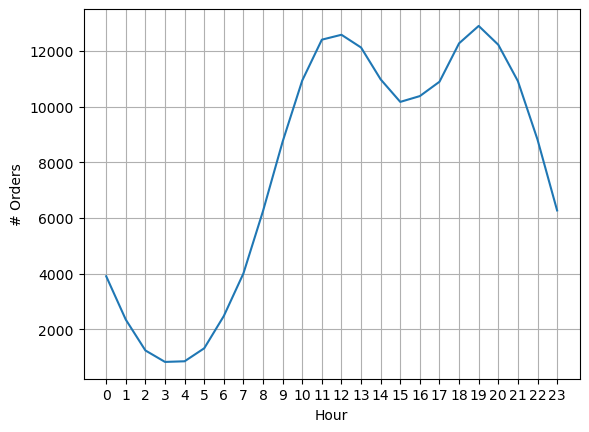

In [32]:
keys = [pair[0] for pair, d in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])

plt.xlabel('Hour')
plt.ylabel('# Orders')
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

#### What products are most often sold together?

In [17]:
df1 = df[df['Order ID'].duplicated(keep=False)]

df1['product_grouped'] = df1.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))

df2 = df1[['Order ID', 'product_grouped']].drop_duplicates()

C:\Users\PC\AppData\Local\Temp\ipykernel_3416\1956786127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['product_grouped'] = df1.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


In [18]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['product_grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

In [19]:
df.groupby(['Product']).sum()['Quantity Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

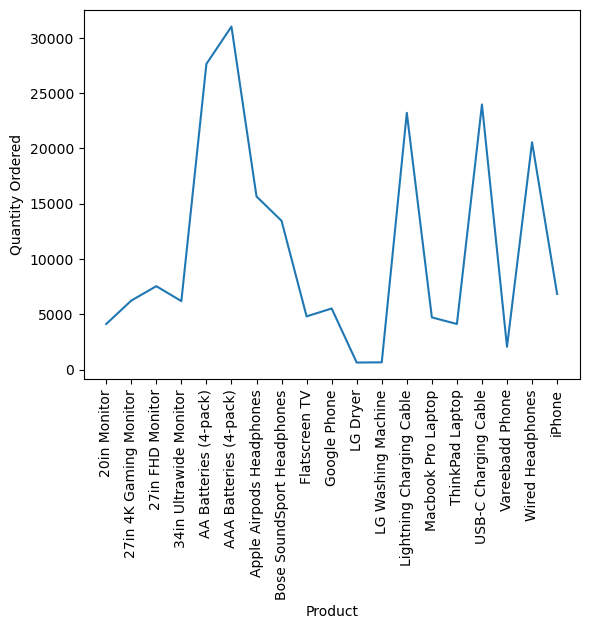

In [29]:
keys = [product[0] for product, d in df.groupby(['Product'])]

plt.plot(keys, df.groupby(['Product']).sum()['Quantity Ordered'])
plt.xticks(keys, rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

In [21]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

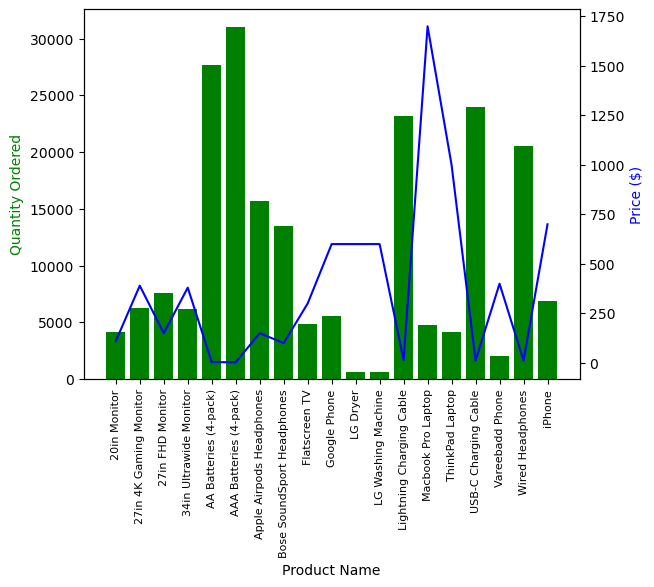

In [30]:
keys = [product[0] for product, d in df.groupby(['Product'])]
quantity_ordered = df.groupby(['Product']).sum()['Quantity Ordered']
prices = df.groupby(['Product']).mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticks(range(len(keys)))
ax1.set_xticklabels(keys, rotation='vertical', size=8)


plt.show()